IMPORT THE LIBRARIES NEEDED


In [66]:
import pandas as pd
import seaborn as sns 
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier


Load the file

In [67]:
df=pd.read_csv("C:/Users/harsh/Desktop/projects/Churn Prediction/Customer-Churn.csv")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [68]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [69]:
cat_cols = [col for col in df.columns if df[col].dtype == "object"]
cat_cols

['customerID',
 'gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'TotalCharges',
 'Churn']

In [70]:
from sklearn.preprocessing import LabelEncoder
for col in cat_cols:
  le = LabelEncoder()
  df[col] = le.fit_transform(df[col])
df.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.85,2505,0
1,3962,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56.95,1466,0


# MODEL TRAINING AND TESTING AND SPLITING

In [71]:
x=df.drop(columns=['Churn'])
y=df['Churn']

In [72]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

# MODEL TRAINING

Logistic REGRESSION

In [73]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

#initialize and train model
model=LogisticRegression()
model.fit(x_train,y_train)

#get prediction
y_pred=model.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1036
           1       0.65      0.56      0.60       373

    accuracy                           0.80      1409
   macro avg       0.75      0.72      0.73      1409
weighted avg       0.80      0.80      0.80      1409



C:\Users\harsh\Downloads\ANACONDA\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


RandomForestClassifier

In [74]:

from sklearn.ensemble import RandomForestClassifier

#initialize and train model
model=RandomForestClassifier()
model.fit(x_train,y_train)

#get prediction
y_pred=model.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.90      0.87      1036
           1       0.65      0.50      0.56       373

    accuracy                           0.80      1409
   macro avg       0.74      0.70      0.72      1409
weighted avg       0.79      0.80      0.79      1409



DecisionTreeClassifier

In [75]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

model=DecisionTreeClassifier()
model.fit(x_train,y_train)

#get prediction
y_pred=model.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.82      0.81      1036
           1       0.48      0.47      0.47       373

    accuracy                           0.73      1409
   macro avg       0.65      0.64      0.64      1409
weighted avg       0.72      0.73      0.72      1409



catboost

In [76]:
!pip install catboost

In [77]:
cat_cols.remove('Churn')
cat_cols

['customerID',
 'gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'TotalCharges']

In [78]:
from catboost import CatBoostClassifier
#initialize and train model
model=CatBoostClassifier(verbose=False)
model.fit(x_train,y_train,cat_features=cat_cols)

#get prediction
y_pred=model.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.90      0.88      1036
           1       0.67      0.55      0.61       373

    accuracy                           0.81      1409
   macro avg       0.76      0.73      0.74      1409
weighted avg       0.80      0.81      0.80      1409



SVC

In [80]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report

model=SVC()
model.fit(x_train,y_train)

#get prediction
y_pred=model.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.74      1.00      0.85      1036
           1       0.00      0.00      0.00       373

    accuracy                           0.74      1409
   macro avg       0.37      0.50      0.42      1409
weighted avg       0.54      0.74      0.62      1409



C:\Users\harsh\Downloads\ANACONDA\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\harsh\Downloads\ANACONDA\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\harsh\Downloads\ANACONDA\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


xgboost

In [81]:
!pip install xgboost

In [82]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

model=XGBClassifier()
model.fit(x_train,y_train)

#get prediction
y_pred=model.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.87      0.86      1036
           1       0.61      0.55      0.58       373

    accuracy                           0.79      1409
   macro avg       0.72      0.71      0.72      1409
weighted avg       0.78      0.79      0.78      1409



GaussianNB

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report

model=XGBClassifier()
model.fit(x_train,y_train)

#get prediction
y_pred=model.predict(x_test)
print(classification_report(y_test,y_pred))

confusion_matrix

<Axes: >

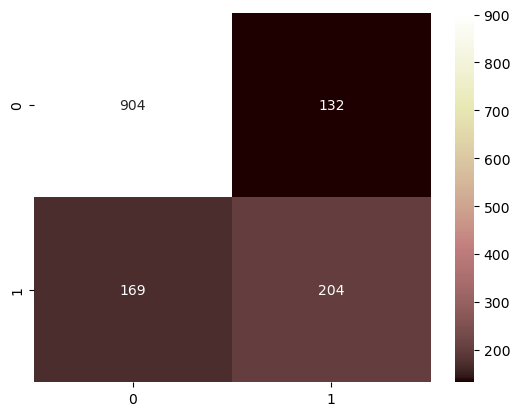

In [84]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='pink')

In [87]:

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'SVC': SVC(probability=True),
    'Naive Bayes': GaussianNB(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    'CatBoost': CatBoostClassifier(verbose=0)
}

# Store results
results = []

for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    y_prob = model.predict_proba(x_test)[:, 1] if hasattr(model, "predict_proba") else model.decision_function(x_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob)

    results.append({
        'Model': name,
        'Accuracy': round(accuracy, 4),
        'Precision': round(precision, 4),
        'Recall': round(recall, 4),
        'F1 Score': round(f1, 4),
        'AUC': round(auc, 4)
    })

# Convert to DataFrame
import pandas as pd
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='F1 Score', ascending=False)

# Display results
print(results_df)


C:\Users\harsh\Downloads\ANACONDA\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\harsh\Downloads\ANACONDA\lib\site-packages\xgboost\training.py:183: UserWarning: [13:12:10] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


                 Model  Accuracy  Precision  Recall  F1 Score     AUC
4          Naive Bayes    0.7580     0.5293  0.7748    0.6289  0.8450
0  Logistic Regression    0.8126     0.6799  0.5523    0.6095  0.8572
6             CatBoost    0.8055     0.6623  0.5416    0.5959  0.8534
5              XGBoost    0.7864     0.6071  0.5469    0.5755  0.8347
1        Random Forest    0.7899     0.6332  0.4906    0.5529  0.8399
2        Decision Tree    0.7097     0.4503  0.4370    0.4435  0.6225
3                  SVC    0.7353     0.0000  0.0000    0.0000  0.8004


In [88]:
results_df = pd.DataFrame(results)

# Display results sorted by Accuracy to find the best performing model
results_df = results_df.sort_values(by='Accuracy', ascending=False)

# Display the sorted results
print("Model Performance Comparison:")
print(results_df)

# Get the best model based on Accuracy
best_model = results_df.iloc[0]
print("\nBest Performing Model Based on Accuracy:")
print(best_model)


Model Performance Comparison:
                 Model  Accuracy  Precision  Recall  F1 Score     AUC
0  Logistic Regression    0.8126     0.6799  0.5523    0.6095  0.8572
6             CatBoost    0.8055     0.6623  0.5416    0.5959  0.8534
1        Random Forest    0.7899     0.6332  0.4906    0.5529  0.8399
5              XGBoost    0.7864     0.6071  0.5469    0.5755  0.8347
4          Naive Bayes    0.7580     0.5293  0.7748    0.6289  0.8450
3                  SVC    0.7353     0.0000  0.0000    0.0000  0.8004
2        Decision Tree    0.7097     0.4503  0.4370    0.4435  0.6225

Best Performing Model Based on Accuracy:
Model        Logistic Regression
Accuracy                  0.8126
Precision                 0.6799
Recall                    0.5523
F1 Score                  0.6095
AUC                       0.8572
Name: 0, dtype: object


In [102]:
# Applying PCA
from sklearn.decomposition import PCA
pca = PCA(0.9)
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)
explained_variance = pca.explained_variance_ratio_

In [103]:
model=RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100,max_depth=6, min_samples_leaf=8)


In [104]:
model.fit(x_train_pca,y_train)

RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [106]:
model.fit(x_train_pca,y_train)

RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [110]:

y_predict_pca = model.predict(x_test_pca)

In [111]:

print(model_score)
print(metrics.classification_report(y_test, y_predict_pca))

0.8055358410220014
              precision    recall  f1-score   support

           0       0.74      1.00      0.85      1036
           1       0.00      0.00      0.00       373

    accuracy                           0.74      1409
   macro avg       0.37      0.50      0.42      1409
weighted avg       0.54      0.74      0.62      1409



C:\Users\harsh\Downloads\ANACONDA\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\harsh\Downloads\ANACONDA\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\harsh\Downloads\ANACONDA\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Pickling the model

In [100]:
import pickle

In [90]:
filename = 'model.sav'

In [92]:
pickle.dump(model, open(filename, 'wb'))

In [93]:
load_model = pickle.load(open(filename, 'rb'))

In [96]:
model_score= load_model.score(x_test, y_test)


In [97]:
model_score

0.8055358410220014